# Import all libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
#Read the table
data=pd.read_excel('ABC Company.xlsx')
data

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [4]:
#Describe the table
data.describe()

,Number,Age,Weight,Salary
count,458.000000,458.000000,458.000000,4.470000e+02
mean,17.713974,26.934498,221.543668,4.833970e+06
std,15.966837,4.400128,26.343200,5.226620e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.025210e+06
50%,13.000000,26.000000,220.000000,2.836186e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


# Let's clean the data

In [5]:
#Let check there is any missing values
print(data.isnull().sum())

Name         0
Team         0
Number       0
Position     0
Age          0
Height       0
Weight       0
College     84
Salary      11
dtype: int64


In [6]:
# 1. Fill missing salary with median salary
data['Salary'].fillna(data['Salary'].median(), inplace=True)

# 2. Remove rows with missing values
data.dropna(subset=['Salary'], inplace=True)

# 3: Fill other missing values as needed (e.g., College)
data['College'].fillna('Unknown', inplace=True)


In [7]:
#Let check all values is filled
print(data.isnull().sum())

Name        0
Team        0
Number      0
Position    0
Age         0
Height      0
Weight      0
College     0
Salary      0
dtype: int64


In [8]:
#Remove the duplicates
data.drop_duplicates(inplace=True)

In [9]:
#Check the data types of each column
print(data.dtypes)

Name         object
Team         object
Number        int64
Position     object
Age           int64
Height       object
Weight        int64
College      object
Salary      float64
dtype: object


In [10]:
# Standardize text columns
data['Team'] = data['Team'].str.lower().str.strip()
data['Position'] = data['Position'].str.upper().str.strip()

In [11]:
# Replace the height column with random numbers between 150 and 180
data['Height'] = np.random.randint(150, 181, size=data.shape[0])

# Verify the changes
print(data[['Name', 'Team', 'Position', 'Height']].head(5))


            Name            Team Position  Height
0  Avery Bradley  boston celtics       PG     161
1    Jae Crowder  boston celtics       SF     165
2   John Holland  boston celtics       SG     163
3    R.J. Hunter  boston celtics       SG     166
4  Jonas Jerebko  boston celtics       PF     156


# Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees

                      Team  Employee Count  Percentage
0     new orleans pelicans              19    4.148472
1        memphis grizzlies              18    3.930131
2                utah jazz              16    3.493450
3          new york knicks              16    3.493450
4          milwaukee bucks              16    3.493450
5            brooklyn nets              15    3.275109
6   portland trail blazers              15    3.275109
7    oklahoma city thunder              15    3.275109
8           denver nuggets              15    3.275109
9       washington wizards              15    3.275109
10              miami heat              15    3.275109
11       charlotte hornets              15    3.275109
12           atlanta hawks              15    3.275109
13       san antonio spurs              15    3.275109
14         houston rockets              15    3.275109
15          boston celtics              15    3.275109
16          indiana pacers              15    3.275109
17        

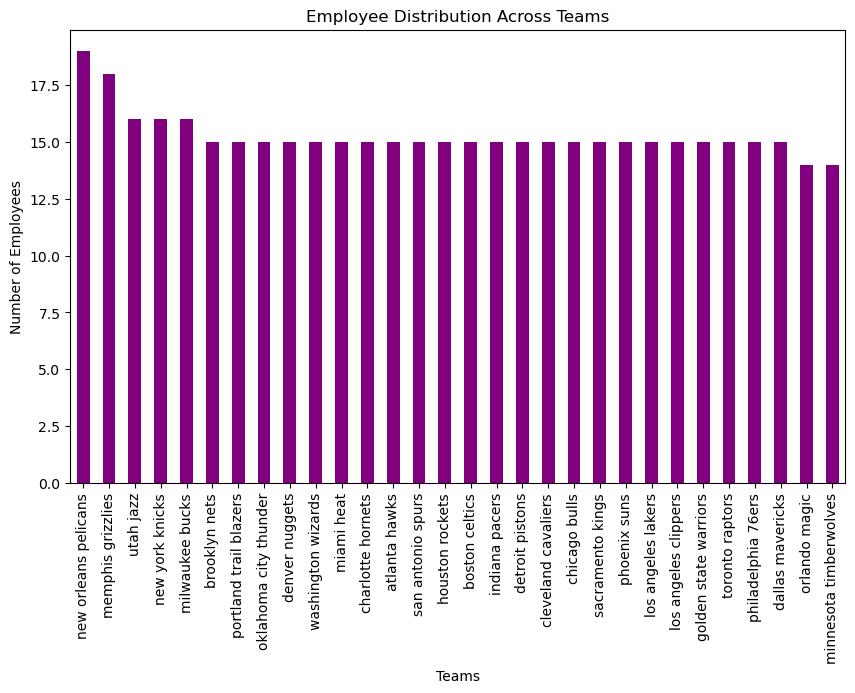

In [21]:
# Calculate the distribution of employees across each team
team_distribution = data['Team'].value_counts()
total_employees = data.shape[0]
team_percentage = (team_distribution / total_employees) * 100

# Create a DataFrame with the results
team_analysis = pd.DataFrame({
    'Employee Count': team_distribution,
    'Percentage': team_percentage
}).reset_index().rename(columns={'index': 'Team'})

print(team_analysis)

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6),dpi=100)
team_distribution.plot(kind='bar',color='purple')
plt.title("Employee Distribution Across Teams")
plt.xlabel("Teams")
plt.ylabel("Number of Employees")
plt.xticks(rotation=90)
plt.show()


# Segregate employees based on their positions within the company

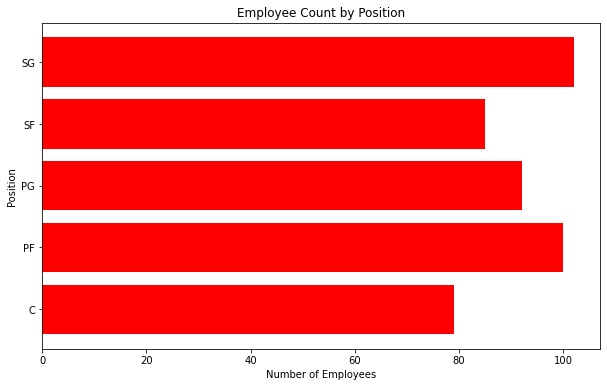

In [23]:
# Group by position and count the number of employees in each position
position_distribution = data.groupby('Position').size().reset_index(name='Employee_Count')
positions = position_distribution['Position']
position_counts = position_distribution['Employee_Count']

# Plot - Horizontal Bar Chart
plt.figure(figsize=(10, 6))
plt.barh(positions, position_counts, color='r')
plt.xlabel('Number of Employees')
plt.ylabel('Position')
plt.title('Employee Count by Position')
plt.show()

# Identify the predominant age group among employees. 

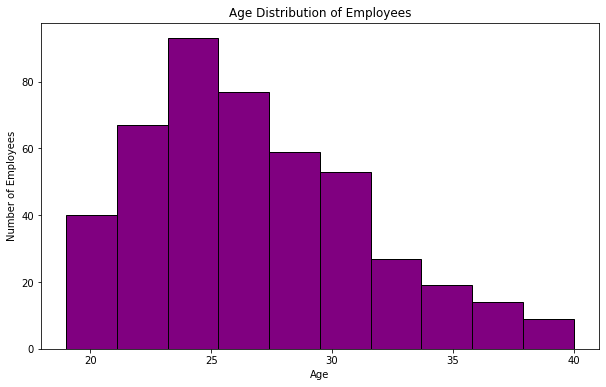

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=10, color='purple', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.title('Age Distribution of Employees')
plt.show()


In [28]:
#By calculation
# Define age bins and labels
age_bins = [18, 25, 30, 35, 40, 45, 50, 60]  # Adjust bins as needed
age_labels = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50+']

# Create an Age Group column based on the bins
data['Age Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of employees in each age group
age_group_counts = data['Age Group'].value_counts().sort_index()

# Display the counts for each age group
print("Age group distribution among employees:")
print(age_group_counts)

# Find and display the predominant age group
predominant_age_group = age_group_counts.idxmax()
print(f"\nThe predominant age group among employees is: {predominant_age_group}")


Age group distribution among employees:
18-24    154
25-29    182
30-34     90
35-39     29
40-44      3
45-49      0
50+        0
Name: Age Group, dtype: int64

The predominant age group among employees is: 25-29


# Discover which team and position have the highest salary expenditure. 

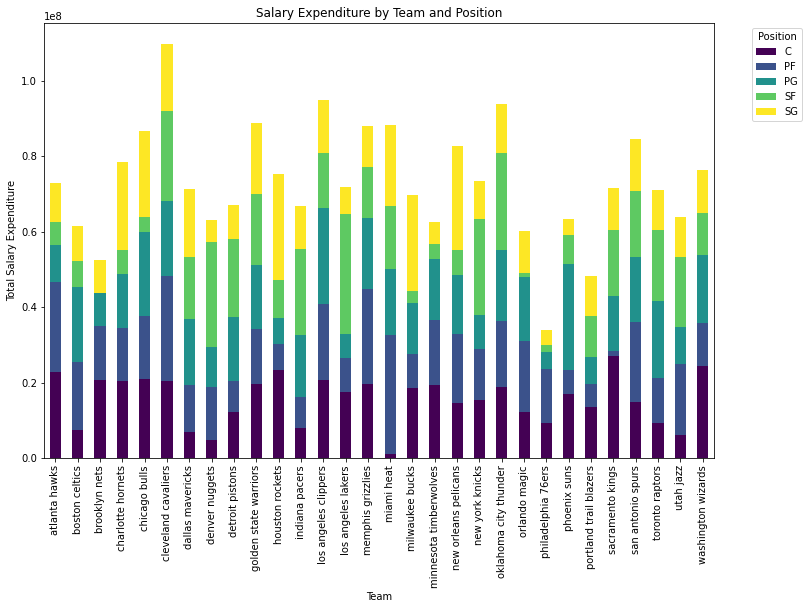

In [26]:
# Calculate the salary expenditure by team and position
team_position_salary = data.groupby(['Team', 'Position'])['Salary'].sum().unstack()

# Plot - Stacked Bar Chart
team_position_salary.plot(kind='bar', stacked=True, figsize=(12, 8), colormap="viridis")
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.title('Salary Expenditure by Team and Position')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [27]:
# Group the data by Team and Position, and sum the Salary
team_position_salary = data.groupby(['Team', 'Position'])['Salary'].sum()

# Find the Team and Position with the maximum salary expenditure
highest_salary_expenditure = team_position_salary.idxmax()
max_expenditure_value = team_position_salary.max()

print(f"The team and position with the highest salary expenditure is: {highest_salary_expenditure}")
print(f"The maximum salary expenditure is: {max_expenditure_value}")


The team and position with the highest salary expenditure is: ('los angeles lakers', 'SF')
The maximum salary expenditure is: 31866445.0


# Investigate if there's any correlation between age and salary, and represent it visually

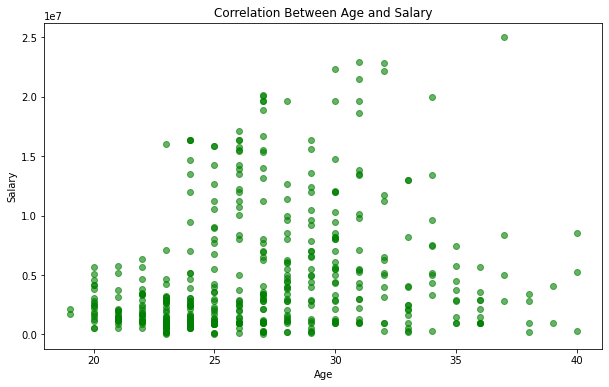

In [29]:
# Plot - Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Age'], data['Salary'], color='green', alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Correlation Between Age and Salary')
plt.show()